<a href="https://colab.research.google.com/github/singhsourav0/Instagram-captions-generator/blob/main/insta_captions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import google.generativeai as genai
import base64
import io
import json
import mimetypes
import pathlib
import pprint
import requests
import textwrap
import PIL.Image
import IPython.display
from IPython.display import display
from IPython.display import Markdown
from google.colab import userdata

# model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
# feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
# tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)


max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
Gemmodel = genai.GenerativeModel('gemini-pro')


from google.colab import userdata
API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=API_KEY)

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

def predict_step(image_paths):
  images = []
  for image_path in [image_paths]:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")
    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)
  output_ids = model.generate(pixel_values, **gen_kwargs)
  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

def GenerateOutput(image_path, mood_category):
    generated_text = predict_step(image_path)
    prompt = f"write captions for instagram with emoji and hashtag. The photo is described as {generated_text[0]} if i my mood is described as {mood_category}";
    response = Gemmodel.generate_content(prompt)
    return to_markdown(response.text)

GenerateOutput("/content/anushkaSen.png", "happy")


In [ ]:
GenerateOutput("/content/features-life-style.jpg", "sad")


> 1. 🌞📸 Feeling the warmth of the sun, but my heart is still cold. Trying to smile through the pain. #FakeItTillYouMakeIt #SadButTrying
> 
> 2. 😞🤳 Taking a selfie in the sun, but it's hard to hide the sadness in my eyes. Wish I could turn back time and change things. #Regret #BittersweetMemories
> 
> 3. 🌤️📷 The sun is shining, but my soul is dark. Hoping that someday, the light will reach me too. #DarknessAndHope #LonelyButHopeful
> 
> 4. 🌞😭 The sun is a reminder of what I've lost. Trying to stay strong, but it's hard when the world feels so empty. #Grieving #FindingStrength
> 
> 5. 😞📸 Smiling for the camera, but my heart is breaking inside. Wish I could turn off my emotions like a light switch. #EmotionalTurmoil #TryingToStayPositive

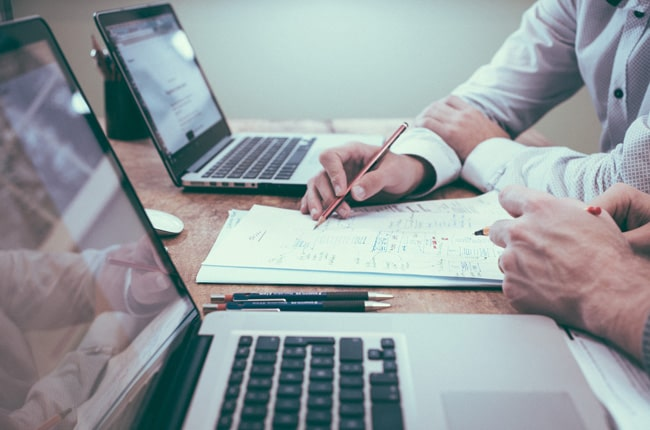

> 1. 💻😅 Powered by productivity and fueled by my laptop! #WFHMood
> 2. 📸💻 Snapping shots and coding notes! My work bestie and I are ready to conquer the day! #CreativeWorkspaces
> 3. 💻✨ Working hard, dreaming big, and typing away on my laptop. This is where magic happens! #TechEnthusiast
> 4. ⌨️🌻 Blooms in my hair, code in my mind! Today's office is a garden of inspiration. #NatureLoverAtWork
> 5. 💻📚 Learning and laughing my way through work! #KnowledgeIsPower
> 6. 💻☕️ Starting the day with a fresh cup of coffee and a dose of productivity. #CoffeeFueledCoding
> 7. 💼💻 Suit up and boot up! Ready to take on Monday with a smile and a laptop. #CorporateNomad
> 8. 💻🌸🌸 Surround by pink, coding in bliss! My desk is a reflection of my happiness. #PastelPower
> 9. 💻🎶 Headphones on, fingers dancing on the keyboard. Music and coding make the perfect harmony. #TechAndTunes
> 10. 📚💻 Following my passion, one line of code at a time. #CodingIsMyHappyPlace

In [ ]:
# prompt: display image

IPython.display.display(Image.open('/content/news-1.jpg'))
GenerateOutput("/content/news-1.jpg", "happy")



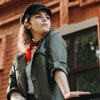

> 1. 💃 Feeling fabulous in this little black dress! #OOTD #HappyVibes
> 
> 
> 2. ☀️ Soaking up some sunshine and loving every minute of it! #SummerLovin' #HappyDays
> 
> 
> 3. 🎉 Celebrating the little things that make life so special! #GratefulHeart #HappySoul
> 
> 
> 4. 🎶 Got my groove on and dancing like nobody's watching! #DanceParty #JoyfulMoments
> 
> 
> 5. 🌸 Happiness blooms wherever I go! #SpringVibes #BloomingWithJoy
> 
> 
> 6. 🌈 Spreadin' happiness like confetti on a windy day! #ColorMeHappy #HappyGoLucky
> 
> 
> 7. 👒 Feeling carefree and fabulous, one twirl at a time! #TwirlingHappiness #HappyDance
> 
> 
> 8. 🌊 Sippin' on sunshine and salty air, life's good! #BeachBabe #HappySeas
> 
> 
> 9. 🐶 Cuddles with my furbaby are the best kind of therapy! #PetTherapy #HappyTails
> 
> 
> 10. 📸 Capturing moments of joy, one click at a time! #HappyMemories #ShutterbugHappiness

In [ ]:
# prompt: display image

IPython.display.display(Image.open('/content/footer-5.jpg'))
GenerateOutput("/content/footer-5.jpg", "happy")


In [ ]:
from flask import Flask, render_template, request, redirect, url_for
from PIL import Image
import google.generativeai as genai
import base64
import io
import os
import textwrap
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from IPython.display import Markdown

app = Flask(__name__)

# Load models and set up global variables
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
Gemmodel = genai.GenerativeModel('gemini-pro')

# Define utility functions
def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

def predict_step(image_paths):
    images = []
    for image_path in [image_paths]:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")
        images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    output_ids = model.generate(pixel_values, **gen_kwargs)
    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds

# Define Flask routes
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/generate', methods=['POST'])
def generate():
    if 'file' not in request.files:
        return redirect(request.url)

    file = request.files['file']
    mood_category = request.form['mood_category']

    if file.filename == '':
        return redirect(request.url)

    image_path = save_and_get_path(file)

    result = GenerateOutput(image_path, mood_category)

    return render_template('result.html', result=result)

def save_and_get_path(file):
    base_path = 'uploads'
    if not os.path.exists(base_path):
        os.makedirs(base_path)

    file_path = os.path.join(base_path, file.filename)
    file.save(file_path)
    return file_path

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import PIL.Image
def x(y):
    img = PIL.Image.open(y)

    model = genai.GenerativeModel('gemini-pro-vision')

    response = model.generate_content(img)

    to_markdown(response.text)

    # response = model.generate_content(["Write a caption about image in one line.", img], stream=True)
    # response.resolve()

    return to_markdown(response.text)


In [ ]:
x("/content/features-sports-1.jpg")

>  The cyclist is wearing a skinsuit which is a one-piece aerodynamic garment that is designed to reduce drag and improve performance. It is made of a thin, lightweight material that is designed to wick away sweat and keep the cyclist cool and dry. The skinsuit also has a number of features that are designed to improve aerodynamics, such as a dropped tail and a close-fitting collar.

In [ ]:

import PIL.Image
def x(y, mood):
    img = PIL.Image.open(y)

    model = genai.GenerativeModel('gemini-pro-vision')
    prompt = f"write 10 captions for instagram with extra emoji and hashtag that describes image and mood. If  my mood is described as {mood}.";
    response = model.generate_content([prompt, img], stream=True)
    response.resolve()

    return to_markdown(response.text)

In [ ]:
Caption:  1. 🍔 When you're trying to eat healthy, but you just can't resist a good burger. #cheatday #guiltypleasure
2main.js:102 Caption:
main.js:102 Caption: 2. 🍕 When you're so hungry, you could eat a whole pizza. #foodporn #🍕